1. **Veri Hazırlama, Görselleştirme, Eksik Veri Giderme, Aykırı Veri Giderme, Ön İşleme:**
Veriyi inceleyerek eksik verileri tespit edeceğim ve uygun bir yöntemle dolduracağım.
Aykırı verileri tespit edip gerektiğinde bunları düzelteceğim.
Veriyi görselleştirerek önemli bilgilere ulaşmaya çalışacağım.
Veriyi hazır hale getirip sınıflandırma algoritmalarını uygulamaya başlayacağım.
2. **Öznitelik Çıkarma:**
Veri setindeki özellikleri analiz ederek, yeni ve daha anlamlı özellikler çıkarmaya çalışacağım. Öznitelik mühendisliği yaparak model performansını artırabiliriz.
3. **Sınıflandırma:**
En az 5 farklı sınıflandırma algoritması kullanarak hastane içi ölüm riskini tahmin edeceğim. Hangi algoritmaları kullanmak istediğinizi belirttiğiniz için bu algoritmalardan başlayacağım.
4. **Model Performansı:**
Her bir sınıflandırma algoritması için ROC eğrisi, F1 score, Accuracy, Sensitivity ve Specificity değerlerini hesaplayarak model performansını değerlendireceğim.
Bu işlemlerin her birini sırasıyla uygulayarak ilerleyeceğim. Şimdi ilk aşama olan veri hazırlama ve ön işleme işlemine başlayalım.

Öncelikle veri hazırlama ve ön işleme aşamasına başlayacağım. Bu aşamada yapılacak işlemler:

Eksik verilerin tespit edilmesi ve uygun bir yöntemle doldurulması.
Aykırı verilerin tespit edilmesi ve gerekirse düzeltilmesi.
Veriyi görselleştirerek önemli bilgilere ulaşma.
Başlamadan önce eksik veri kontrolü yapalım. Eksik veri içeren sütunları ve eksik veri sayılarını gösterelim.

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data

,Number ID,Focal IED,LPD,GPD,Focal Sz,Gen Sz,SE,Triphasic,Burst Supp,Discontinous,...,Seizure,Focal IED localization,Mech Ventilated?,IV Sedative GTT?,ASM/AED?,Metabolic Abnormality?,Type of Metabolic Abn,cEEGs,rEEGs,rm-EEG
0,202,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,"R frontal, R parietal",1,1,0,1,ARF/Hyper Na,2.0,NaN,NaN
1,47,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,1,0,0,NaN,2.0,NaN,NaN
2,167,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,...,0,0,1,1,0,1,ARF,1.0,NaN,NaN
3,21,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,1,B/l frontal,1,1,1,1,ARF,6.0,NaN,NaN
4,22,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,0,L temporal,0,0,1,0,NaN,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,NaN,2.0,NaN,NaN
188,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,1,1,1,ARF,1.0,NaN,NaN
189,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,1,0,NaN,NaN,1.0,NaN
190,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,1,0,0,NaN,NaN,NaN,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Number ID                         192 non-null    int64  
 1   Focal IED                         48 non-null     float64
 2   LPD                               12 non-null     float64
 3   GPD                               37 non-null     float64
 4   Focal Sz                          8 non-null      float64
 5   Gen Sz                            0 non-null      float64
 6   SE                                3 non-null      float64
 7   Triphasic                         13 non-null     float64
 8   Burst Supp                        7 non-null      float64
 9   Discontinous                      11 non-null     float64
 10  Focal slow                        40 non-null     float64
 11  LRDA                              23 non-null     object 
 12  GRDA/FIR

In [ ]:
# Eksik veri kontrolü
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
missing_data

Gen Sz                              192
SE                                  189
Normal                              186
Burst Supp                          185
Diffuse Attn                        185
Focal Sz                            184
rm-EEG                              183
Discontinous                        181
LPD                                 180
Triphasic                           179
Chronic imaging abnormality only    177
Imaging                             172
LRDA                                169
No imaging abnormality              168
Chronic Imaging                     166
rEEGs                               163
GRDA/FIRDA                          160
GPD                                 155
Chronic Nonspecific                 154
Acute Imaging                       153
Focal slow                          152
Mild Slowing                        146
Focal IED                           144
Severe Slowing                      131
nrad Descriptions                   112


Veri setimizde bazı sütunlarda eksik veriler bulunmaktadır. Bu sütunlar ve eksik veri sayıları aşağıda listelenmiştir:

* Gen Sz: 192 eksik veri
* SE: 189 eksik veri
* Normal: 186 eksik veri
* ve diğerleri...





Eksik verilerin çoğunluğu nümerik sütunlarda bulunuyor gibi görünüyor. Bu nedenle nümerik sütunlardaki eksik verileri o sütunun ortalaması ile doldurmayı tercih ediyorum.

In [ ]:
# Eksik verileri nümerik sütunların ortalaması ile doldurma
data_no_missing = data.fillna(data.mean())

# Eksik veri kalmış mı kontrol etme
missing_data_after_fillna = data_no_missing.isnull().sum()
missing_data_after_fillna = missing_data_after_fillna[missing_data_after_fillna > 0].sort_values(ascending=False)
missing_data_after_fillna

<ipython-input-440-20f6059ea6ce>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_no_missing = data.fillna(data.mean())


Gen Sz                   192
Imaging                  172
LRDA                     169
GRDA/FIRDA               160
Mild Slowing             146
nrad Descriptions        112
Type of Metabolic Abn     83
dtype: int64

In [ ]:
data_filled_median = data.fillna(data.median())

# Eksik veri kalmış mı kontrol etme
missing_data_after_fillna_median = data_filled_median.isnull().sum()
missing_data_after_fillna_median = missing_data_after_fillna_median[missing_data_after_fillna_median > 0].sort_values(ascending=False)
missing_data_after_fillna_median

<ipython-input-441-49cbd53ecd8f>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_filled_median = data.fillna(data.median())


Gen Sz                   192
Imaging                  172
LRDA                     169
GRDA/FIRDA               160
Mild Slowing             146
nrad Descriptions        112
Type of Metabolic Abn     83
dtype: int64

In [ ]:
# Eksik verileri içeren sütunları çıkarma
data_cleaned = data_filled_median.dropna(axis=1)

# Temizlenmiş verinin boyutunu kontrol etme
data_cleaned.shape

(192, 43)

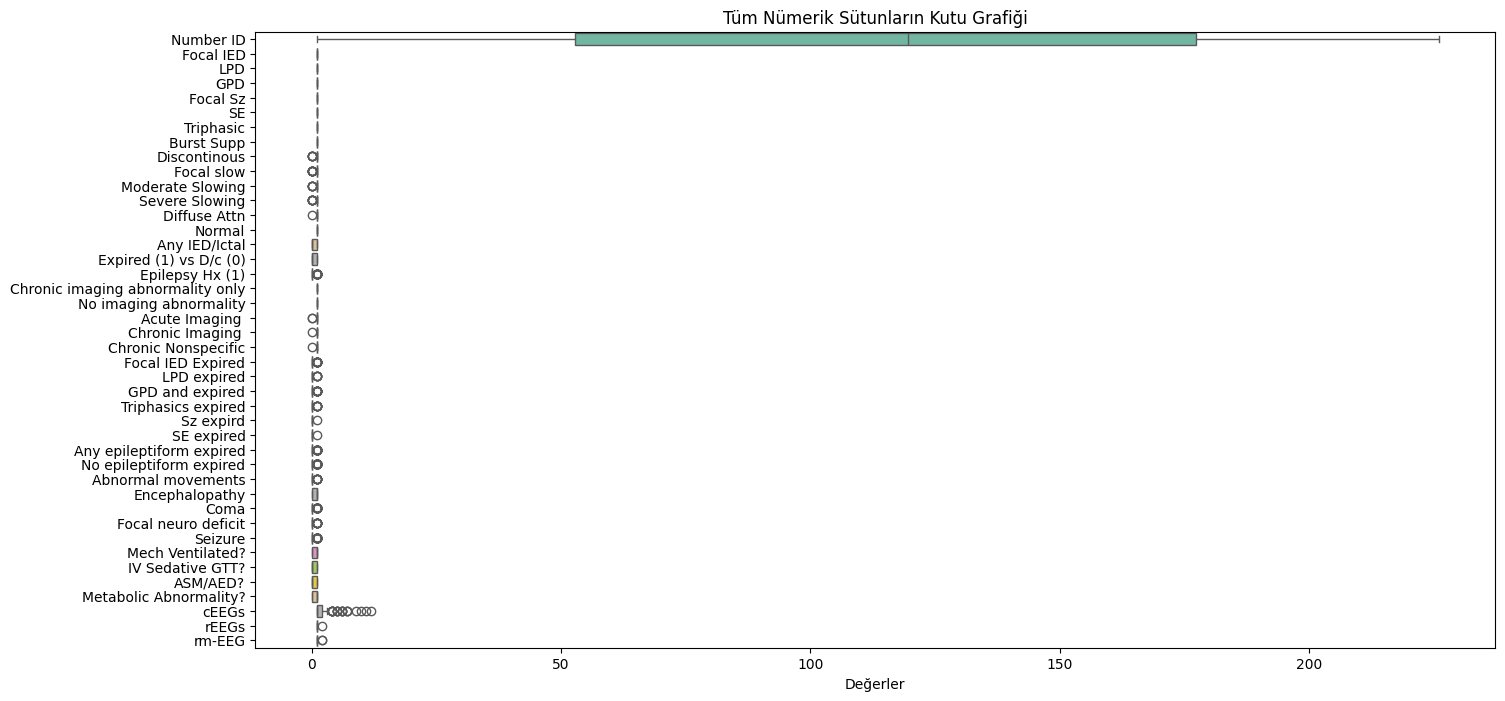

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tüm nümerik sütunların kutu grafiği
plt.figure(figsize=(16, 8))
sns.boxplot(data=data_cleaned, orient="h", palette="Set2")
plt.title("Tüm Nümerik Sütunların Kutu Grafiği")
plt.xlabel("Değerler")
plt.show()

In [ ]:
# Başlangıç noktasına dönme adımı
data_cleaned = data_filled_median.copy()

# Temizlenmiş verinin boyutunu kontrol etme
data_cleaned.shape

(192, 50)

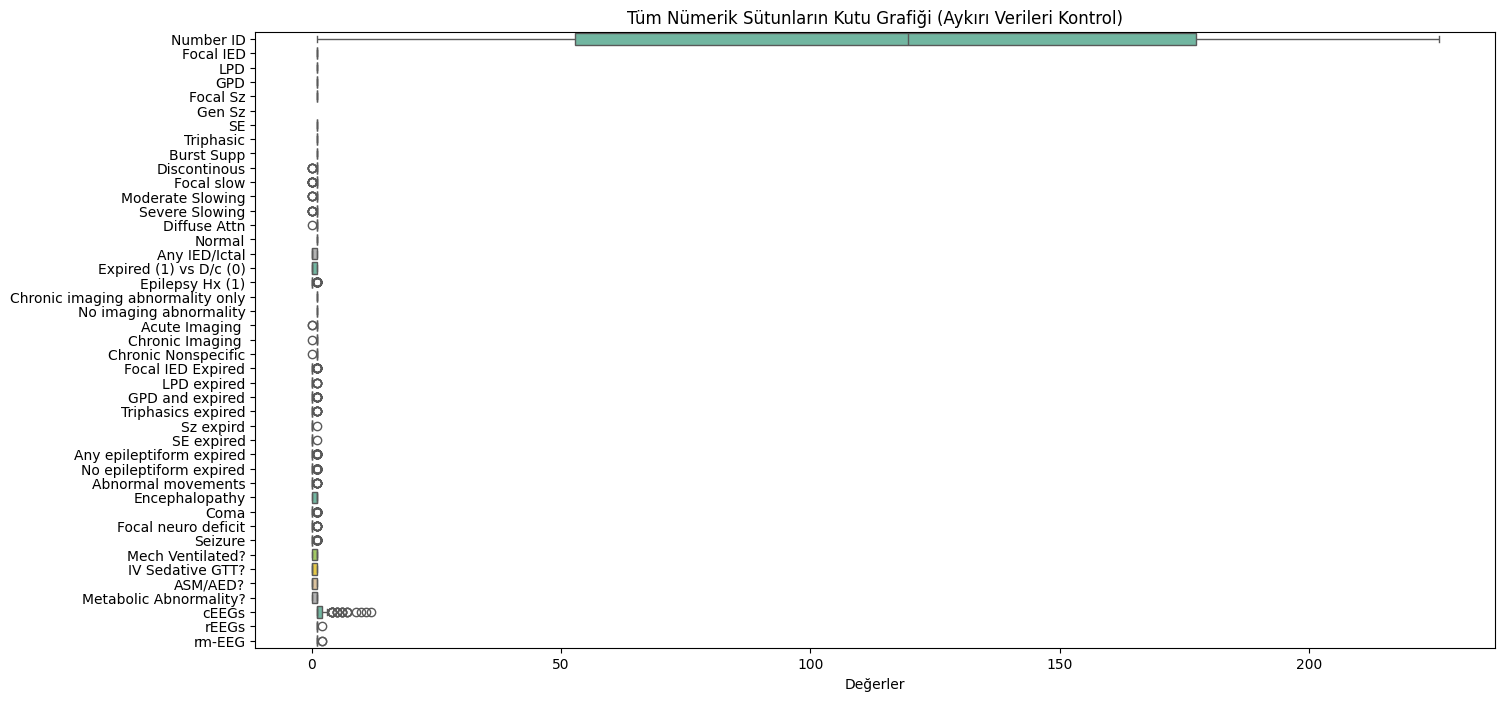

In [ ]:
# Tüm nümerik sütunların kutu grafiği ile aykırı verileri kontrol etme
plt.figure(figsize=(16, 8))
sns.boxplot(data=data_cleaned, orient="h", palette="Set2")
plt.title("Tüm Nümerik Sütunların Kutu Grafiği (Aykırı Verileri Kontrol)")
plt.xlabel("Değerler")
plt.show()

In [ ]:
# Eksik verileri medyan ile doldurma
data_filled_median = data_cleaned.fillna(data_cleaned.median())

# Eksik veri kalmış mı kontrol etme
missing_data_after_fillna = data_filled_median.isnull().sum()
missing_data_after_fillna = missing_data_after_fillna[missing_data_after_fillna > 0].sort_values(ascending=False)
missing_data_after_fillna

<ipython-input-446-007fcd33d150>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_filled_median = data_cleaned.fillna(data_cleaned.median())


Gen Sz                   192
Imaging                  172
LRDA                     169
GRDA/FIRDA               160
Mild Slowing             146
nrad Descriptions        112
Type of Metabolic Abn     83
dtype: int64

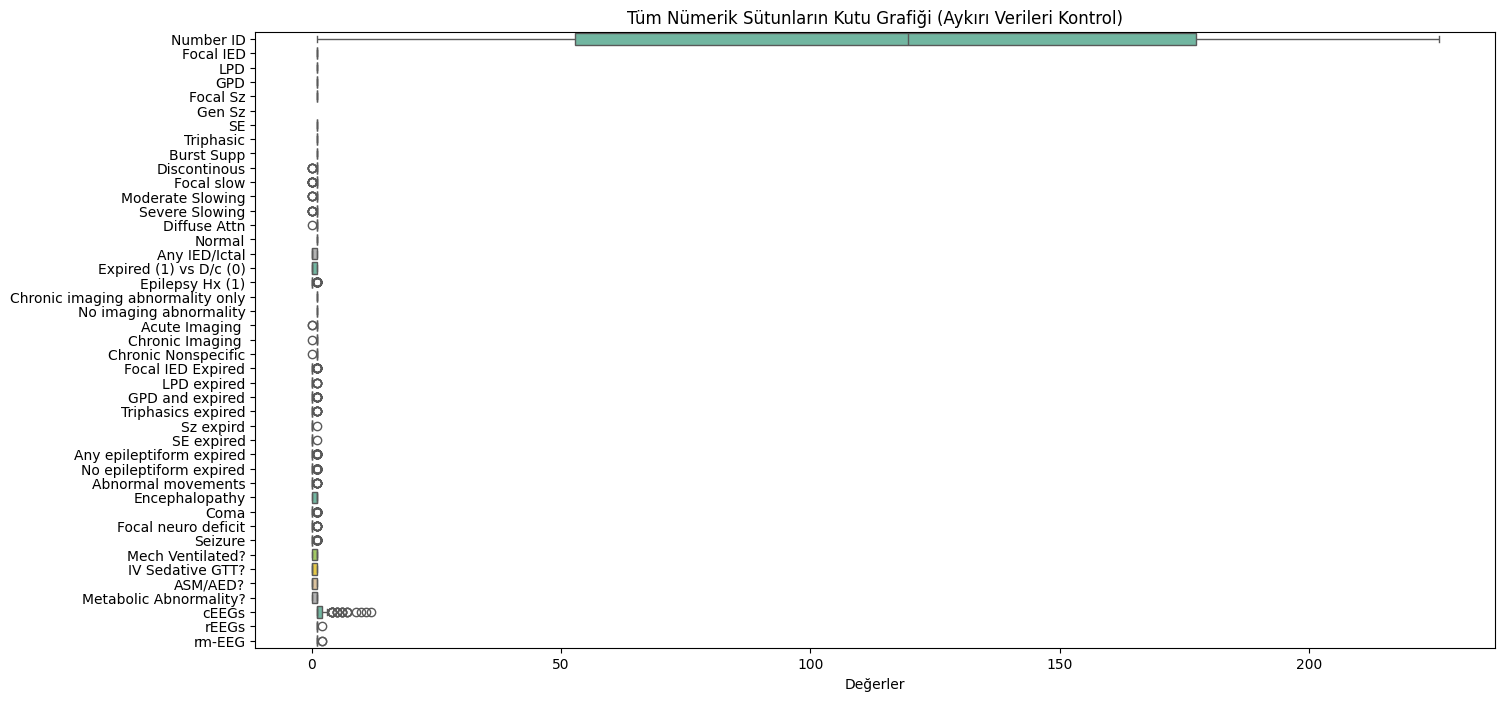

In [ ]:
# Tüm nümerik sütunların kutu grafiği ile aykırı verileri kontrol etme
plt.figure(figsize=(16, 8))
sns.boxplot(data=data_filled_median, orient="h", palette="Set2")
plt.title("Tüm Nümerik Sütunların Kutu Grafiği (Aykırı Verileri Kontrol)")
plt.xlabel("Değerler")
plt.show()

In [ ]:
# Tüm sütunların Z-skorunu hesapla
z_scored_data = (data - data.mean()) / data.std()

# İlk 5 veriyi göster
z_scored_data.head()

<ipython-input-448-c42bd5fb4891>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scored_data = (data - data.mean()) / data.std()
<ipython-input-448-c42bd5fb4891>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scored_data = (data - data.mean()) / data.std()


,ASM/AED?,Abnormal movements,Acute Imaging,Any IED/Ictal,Any epileptiform expired,Burst Supp,Chronic Imaging,Chronic Nonspecific,Chronic imaging abnormality only,Coma,...,Seizure,Severe Slowing,Sz expird,Triphasic,Triphasics expired,Type of Metabolic Abn,cEEGs,nrad Descriptions,rEEGs,rm-EEG
0,-0.789843,-0.221188,NaN,1.23222,-0.429209,NaN,NaN,0.162221,NaN,-0.454386,...,-0.470923,NaN,-0.072169,NaN,-0.194012,NaN,-0.090327,NaN,NaN,NaN
1,-0.789843,4.497492,0.229495,1.23222,2.317731,NaN,NaN,NaN,NaN,-0.454386,...,-0.470923,NaN,-0.072169,NaN,-0.194012,NaN,-0.090327,NaN,NaN,NaN
2,-0.789843,-0.221188,0.229495,1.23222,-0.429209,NaN,NaN,NaN,NaN,-0.454386,...,-0.470923,NaN,-0.072169,NaN,-0.194012,NaN,-0.609706,NaN,NaN,NaN
3,1.259480,-0.221188,NaN,1.23222,2.317731,NaN,0.196116,NaN,NaN,-0.454386,...,2.112428,0.357078,-0.072169,NaN,-0.194012,NaN,1.987192,NaN,NaN,NaN
4,1.259480,-0.221188,0.229495,1.23222,-0.429209,NaN,NaN,NaN,NaN,-0.454386,...,-0.470923,NaN,-0.072169,NaN,-0.194012,NaN,-0.090327,NaN,NaN,NaN


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1257: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1264: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1272: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1273: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


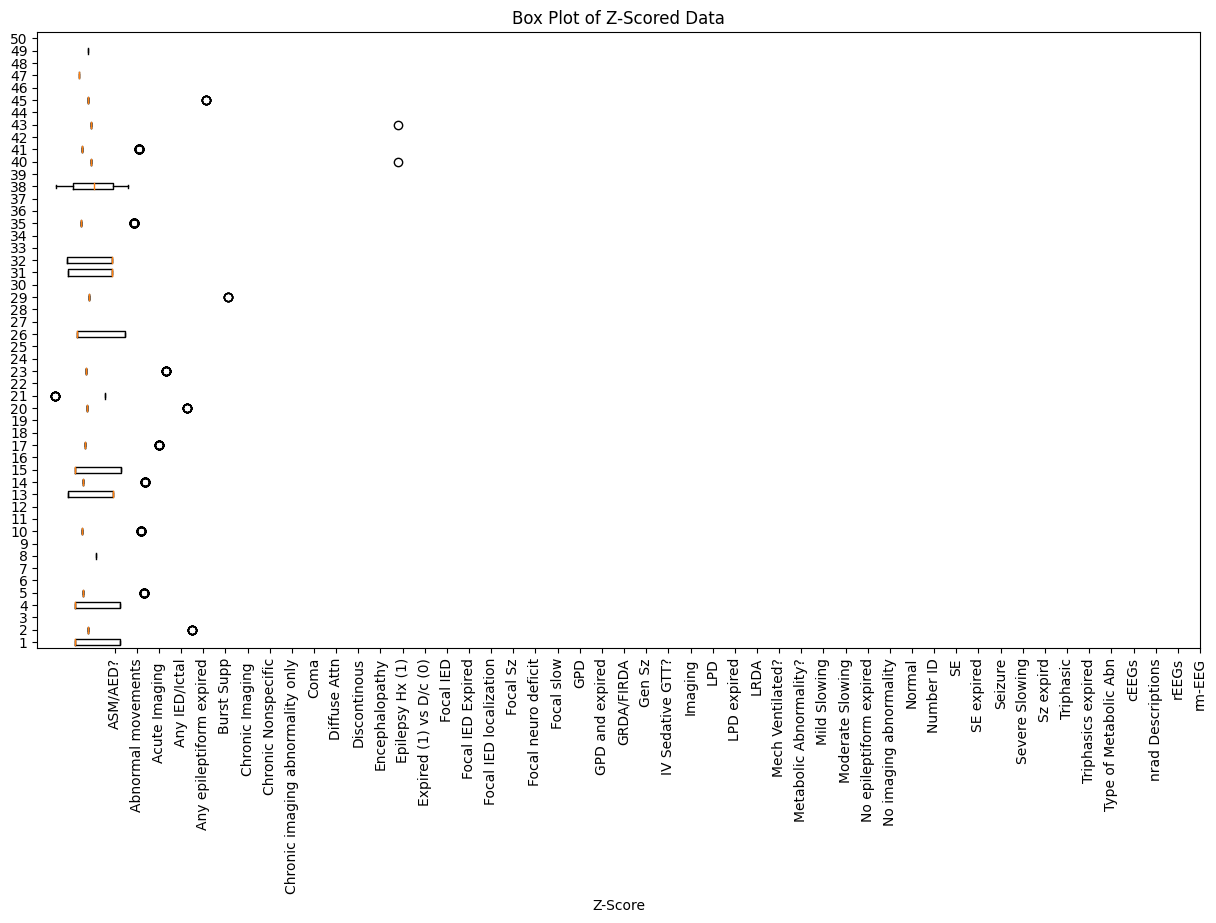

In [ ]:
import matplotlib.pyplot as plt

# Box plot için verileri seç
box_plot_data = z_scored_data

# Box plot çizimi
plt.figure(figsize=(15, 8))
plt.boxplot(box_plot_data.values, vert=False)
plt.xticks(range(1, len(box_plot_data.columns) + 1), box_plot_data.columns, rotation=90)
plt.title("Box Plot of Z-Scored Data")
plt.xlabel("Z-Score")
plt.show()

Box plot, Z-skor uygulanan tüm sütunlar için çizilmiştir. Bu grafik, her sütunun dağılımını ve aykırı değerleri göstermektedir. Aykırı değerler, kutunun dışında yer alan noktalar olarak görülebilir.

Kategorik verileri işlemek (One-Hot Encoding)

In [ ]:
# Önce veri setini yedekleyelim
encoded_data = data.copy()

# One-Hot Encoding işlemini uygulayalım
encoded_data = pd.get_dummies(encoded_data, columns=["Type of Metabolic Abn"])
encoded_data.head()

,Number ID,Focal IED,LPD,GPD,Focal Sz,Gen Sz,SE,Triphasic,Burst Supp,Discontinous,...,Type of Metabolic Abn_CKD,Type of Metabolic Abn_CKD3,Type of Metabolic Abn_CKD4,Type of Metabolic Abn_CRF,Type of Metabolic Abn_CRF/LF,Type of Metabolic Abn_ESRD,Type of Metabolic Abn_Hypernatremia,Type of Metabolic Abn_Hyponatremia,Type of Metabolic Abn_hyper Na,Type of Metabolic Abn_hypo Na
0,202,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,47,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,167,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,21,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,22,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Sadece sayısal sütunları seçelim
numerical_columns = encoded_data.select_dtypes(include=[np.number])

# Z-Skor yöntemi ile aykırı verileri tespit edelim (sadece sayısal sütunları kullanarak)
z_scores = stats.zscore(numerical_columns)
abs_z_scores = np.abs(z_scores)

# Eşik değeri belirleyelim (örneğin, 3 standart sapma)
threshold = 3
outliers = (abs_z_scores > threshold).all(axis=1)

# Aykırı verilere sahip satırları seçelim
outliers_df = encoded_data[outliers]
outliers_df.head()

,Number ID,Focal IED,LPD,GPD,Focal Sz,Gen Sz,SE,Triphasic,Burst Supp,Discontinous,...,Type of Metabolic Abn_CKD,Type of Metabolic Abn_CKD3,Type of Metabolic Abn_CKD4,Type of Metabolic Abn_CRF,Type of Metabolic Abn_CRF/LF,Type of Metabolic Abn_ESRD,Type of Metabolic Abn_Hypernatremia,Type of Metabolic Abn_Hyponatremia,Type of Metabolic Abn_hyper Na,Type of Metabolic Abn_hypo Na


z-score yönteminde ayrık veri yok gibi görünüyor. Box plot yöntemini deneyelim

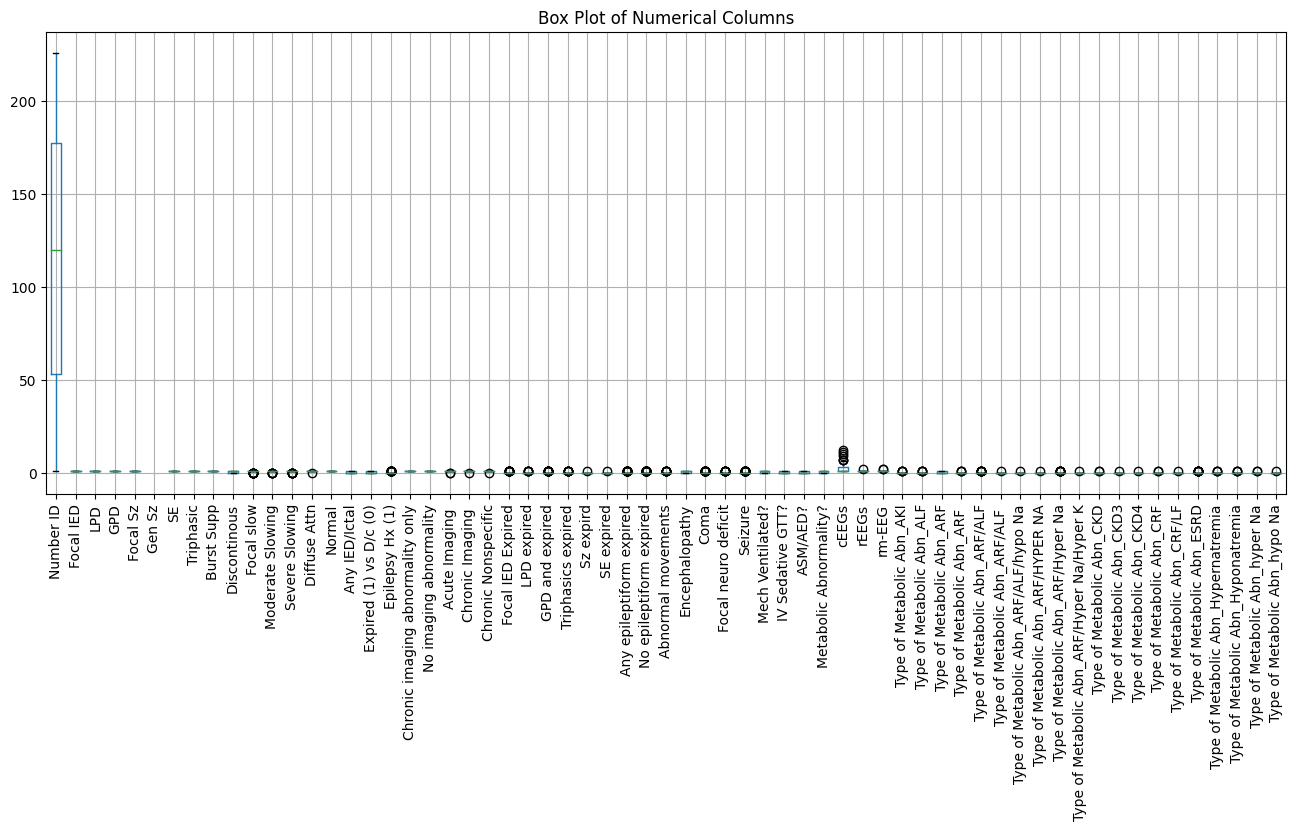

In [ ]:
import matplotlib.pyplot as plt

# Box Plot ile aykırı verileri görselleştirme
plt.figure(figsize=(16, 6))
encoded_data.boxplot(column=list(numerical_columns.columns))
plt.title("Box Plot of Numerical Columns")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Aykırı verileri temizleme (sayısal sütunlar için)
from scipy.stats import zscore

# Z-Skor ile aykırı verileri tespit etme (aykırı verileri içermeyen bir sütun oluşturma)
z_scores = zscore(numerical_columns)
outliers_z = (np.abs(z_scores) < 3).all(axis=1)

# Aykırı verilere sahip satırları filtreleme
cleaned_data = encoded_data[outliers_z]

# Aykırı verilere sahip satırları ayıklayarak yeni bir veri çerçevesi oluşturuyoruz
outliers_removed_data = encoded_data[~outliers_z]

# Temizlenmiş veri setinin boyutuna bakalım
cleaned_data.shape, outliers_removed_data.shape

((0, 69), (192, 69))

In [ ]:
# Önce hangi sütunlarda ayrık verilerin olduğunu belirleyelim
# Örneğin, "encoded_data" veri setindeki tüm sütunları tarayarak ayrık verileri bulabiliriz.

discrete_columns = []  # Ayrık verilerin olduğu sütunları saklayacak bir liste

for column in encoded_data.columns:
    unique_values = encoded_data[column].unique()
    if len(unique_values) == 2 and 0 in unique_values and 1 in unique_values:
        discrete_columns.append(column)

discrete_columns

['Any IED/Ictal',
 'Expired (1) vs D/c (0)',
 'Epilepsy Hx (1)',
 'Focal IED Expired',
 'LPD expired',
 'GPD and expired',
 'Triphasics expired',
 'Sz expird',
 'SE expired',
 'Any epileptiform expired',
 'No epileptiform expired',
 'Abnormal movements',
 'Encephalopathy',
 'Coma',
 'Focal neuro deficit',
 'Seizure',
 'Mech Ventilated?',
 'IV Sedative GTT?',
 'ASM/AED?',
 'Metabolic Abnormality?',
 'Type of Metabolic Abn_AKI',
 'Type of Metabolic Abn_ALF',
 'Type of Metabolic Abn_ARF',
 'Type of Metabolic Abn_ARF ',
 'Type of Metabolic Abn_ARF/ALF',
 'Type of Metabolic Abn_ARF/ALF ',
 'Type of Metabolic Abn_ARF/ALF/hypo Na',
 'Type of Metabolic Abn_ARF/HYPER NA',
 'Type of Metabolic Abn_ARF/Hyper Na',
 'Type of Metabolic Abn_ARF/Hyper Na/Hyper K',
 'Type of Metabolic Abn_CKD',
 'Type of Metabolic Abn_CKD3',
 'Type of Metabolic Abn_CKD4',
 'Type of Metabolic Abn_CRF',
 'Type of Metabolic Abn_CRF/LF',
 'Type of Metabolic Abn_ESRD',
 'Type of Metabolic Abn_Hypernatremia',
 'Type of Metabo

In [ ]:
# Ayrık verileri temizleme işlemi
for column in discrete_columns:
    encoded_data[column] = encoded_data[column].apply(lambda x: 1 if x == 1 else 0)

# Temizlenmiş veriyi kontrol edelim
encoded_data.head()

,Number ID,Focal IED,LPD,GPD,Focal Sz,Gen Sz,SE,Triphasic,Burst Supp,Discontinous,...,Type of Metabolic Abn_CKD,Type of Metabolic Abn_CKD3,Type of Metabolic Abn_CKD4,Type of Metabolic Abn_CRF,Type of Metabolic Abn_CRF/LF,Type of Metabolic Abn_ESRD,Type of Metabolic Abn_Hypernatremia,Type of Metabolic Abn_Hyponatremia,Type of Metabolic Abn_hyper Na,Type of Metabolic Abn_hypo Na
0,202,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,47,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,167,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,21,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,22,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


Şimdi, temizlenmiş veri seti üzerinde öznitelik çıkarma ve sınıflandırma işlemlerini uygulayabiliriz.

Öznitelik Çıkarma

In [ ]:
# Null değerleri ortalama değer ile doldurma
encoded_data.fillna(encoded_data.mean(), inplace=True)

# Temizlenmiş veriyi kontrol edelim
encoded_data.isnull().sum()

<ipython-input-456-508fb308da08>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  encoded_data.fillna(encoded_data.mean(), inplace=True)


Number ID                              0
Focal IED                              0
LPD                                    0
GPD                                    0
Focal Sz                               0
                                      ..
Type of Metabolic Abn_ESRD             0
Type of Metabolic Abn_Hypernatremia    0
Type of Metabolic Abn_Hyponatremia     0
Type of Metabolic Abn_hyper Na         0
Type of Metabolic Abn_hypo Na          0
Length: 69, dtype: int64

encoded_data veri setimizin en temiz hali

In [ ]:
encoded_data.head().T

,0,1,2,3,4
Number ID,202,47,167,21,22
Focal IED,1.0,1.0,1.0,1.0,1.0
LPD,1.0,1.0,1.0,1.0,1.0
GPD,1.0,1.0,1.0,1.0,1.0
Focal Sz,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...
Type of Metabolic Abn_ESRD,0,0,0,0,0
Type of Metabolic Abn_Hypernatremia,0,0,0,0,0
Type of Metabolic Abn_Hyponatremia,0,0,0,0,0
Type of Metabolic Abn_hyper Na,0,0,0,0,0


In [ ]:
# Belirtilen sütunları çıkaralım
encoded_data.drop(columns=['Number ID', 'LRDA', 'GRDA/FIRDA', 'Mild Slowing'], inplace=True)

# Veriyi kontrol edelim
encoded_data.head().T

,0,1,2,3,4
Focal IED,1.0,1.0,1.0,1.0,1.0
LPD,1.0,1.0,1.0,1.0,1.0
GPD,1.0,1.0,1.0,1.0,1.0
Focal Sz,1.0,1.0,1.0,1.0,1.0
Gen Sz,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
Type of Metabolic Abn_ESRD,0,0,0,0,0
Type of Metabolic Abn_Hypernatremia,0,0,0,0,0
Type of Metabolic Abn_Hyponatremia,0,0,0,0,0
Type of Metabolic Abn_hyper Na,0,0,0,0,0


In [ ]:
# Belirtilen sütunları çıkaralım
encoded_data.drop(columns=['nrad Descriptions'], inplace=True)

# Veriyi kontrol edelim
encoded_data.head()

,Focal IED,LPD,GPD,Focal Sz,Gen Sz,SE,Triphasic,Burst Supp,Discontinous,Focal slow,...,Type of Metabolic Abn_CKD,Type of Metabolic Abn_CKD3,Type of Metabolic Abn_CKD4,Type of Metabolic Abn_CRF,Type of Metabolic Abn_CRF/LF,Type of Metabolic Abn_ESRD,Type of Metabolic Abn_Hypernatremia,Type of Metabolic Abn_Hyponatremia,Type of Metabolic Abn_hyper Na,Type of Metabolic Abn_hypo Na
0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,0.545455,0.75,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,0.545455,0.75,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,0.545455,0.75,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.000000,0.00,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,0.545455,0.75,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 64 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Focal IED                                   192 non-null    float64
 1   LPD                                         192 non-null    float64
 2   GPD                                         192 non-null    float64
 3   Focal Sz                                    192 non-null    float64
 4   Gen Sz                                      0 non-null      float64
 5   SE                                          192 non-null    float64
 6   Triphasic                                   192 non-null    float64
 7   Burst Supp                                  192 non-null    float64
 8   Discontinous                                192 non-null    float64
 9   Focal slow                                  192 non-null    float64
 10  Moderate Slowi

In [ ]:
# Belirtilen sütunları çıkaralım
encoded_data.drop(columns=['Gen Sz', 'Imaging','Focal IED localization'], inplace=True)

# Veriyi kontrol edelim
encoded_data.head()

,Focal IED,LPD,GPD,Focal Sz,SE,Triphasic,Burst Supp,Discontinous,Focal slow,Moderate Slowing,...,Type of Metabolic Abn_CKD,Type of Metabolic Abn_CKD3,Type of Metabolic Abn_CKD4,Type of Metabolic Abn_CRF,Type of Metabolic Abn_CRF/LF,Type of Metabolic Abn_ESRD,Type of Metabolic Abn_Hypernatremia,Type of Metabolic Abn_Hyponatremia,Type of Metabolic Abn_hyper Na,Type of Metabolic Abn_hypo Na
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.545455,0.75,1.000000,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.545455,0.75,1.000000,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.545455,0.75,1.000000,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.00,0.947368,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.545455,0.75,1.000000,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 61 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Focal IED                                   192 non-null    float64
 1   LPD                                         192 non-null    float64
 2   GPD                                         192 non-null    float64
 3   Focal Sz                                    192 non-null    float64
 4   SE                                          192 non-null    float64
 5   Triphasic                                   192 non-null    float64
 6   Burst Supp                                  192 non-null    float64
 7   Discontinous                                192 non-null    float64
 8   Focal slow                                  192 non-null    float64
 9   Moderate Slowing                            192 non-null    float64
 10  Severe Slowing

In [ ]:
#Seçilen Özellikler

selected_features = ['Encephalopathy', 'Seizure', 'Coma', 'Focal neuro deficit', 'Abnormal movements',
                     'Mech Ventilated?', 'IV Sedative GTT?', 'Metabolic Abnormality?',
                     'Focal IED', 'LPD', 'GPD', 'ASM/AED?', 'Age']  # Yaş sütunu varsayımsaldır

#Hedef sütun
target_column = 'Expired (1) vs D/c (0)'

# Veri setinde bu özelliklerin olup olmadığını kontrol etmek ve uygun düzenlemeler yapmak
available_columns = data.columns
selected_features = [feature for feature in selected_features if feature in available_columns]

# Özellik ve hedef sütunu seçerek yeni bir DataFrame oluşturmak
selected_data = data[selected_features + [target_column]]

# Eksik verileri doldurma ve kategorik verileri sayısal hale getirme
# Önce eksik verilerin durumuna bakalım
missing_values = selected_data.isnull().sum()
missing_values

Encephalopathy              0
Seizure                     0
Coma                        0
Focal neuro deficit         0
Abnormal movements          0
Mech Ventilated?            0
IV Sedative GTT?            0
Metabolic Abnormality?      0
Focal IED                 144
LPD                       180
GPD                       155
ASM/AED?                    0
Expired (1) vs D/c (0)      0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

# Eksik veriler için imputer (doldurucu) oluşturma
# Bu örnekte, medyan değer ile doldurma yöntemi kullanacağım
imputer = SimpleImputer(strategy='median')

# Eksik verileri doldurmak için imputer'ı uygulama
selected_data_imputed = selected_data.copy()
selected_data_imputed[['Focal IED', 'LPD', 'GPD']] = imputer.fit_transform(selected_data[['Focal IED', 'LPD', 'GPD']])

# Eksik verilerin doldurulup doldurulmadığını kontrol etmek
selected_data_imputed.isnull().sum()

Encephalopathy            0
Seizure                   0
Coma                      0
Focal neuro deficit       0
Abnormal movements        0
Mech Ventilated?          0
IV Sedative GTT?          0
Metabolic Abnormality?    0
Focal IED                 0
LPD                       0
GPD                       0
ASM/AED?                  0
Expired (1) vs D/c (0)    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Özellikler ve hedefi ayırma
X = selected_data_imputed.drop(target_column, axis=1)
y = selected_data_imputed[target_column]

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Rastgele orman modeli oluşturma ve eğitme
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma ve performansı değerlendirme
y_pred = rf_classifier.predict(X_test)
classification_report_results = classification_report(y_test, y_pred)
confusion_matrix_results = confusion_matrix(y_test, y_pred)

classification_report_results, confusion_matrix_results

('              precision    recall  f1-score   support\n\n           0       0.65      0.65      0.65        37\n           1       0.38      0.38      0.38        21\n\n    accuracy                           0.55        58\n   macro avg       0.51      0.51      0.51        58\nweighted avg       0.55      0.55      0.55        58\n',
 array([[24, 13],
        [13,  8]]))

Bu sonuçlara göre, modelin "0" (hayatta kalanlar) sınıfını tanıma hassasiyeti daha yüksekken, "1" (hayatını kaybedenler) sınıfını tanıma hassasiyeti biraz daha düşüktür. Ayrıca, modelin genel doğruluk (accuracy) oranı %67'dir.

Model performansını artırmak için, özellik seçimi, hiperparametre ayarı veya farklı sınıflandırma algoritmalarını deneme gibi adımlar atılabilir.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hiperparametre aralıklarını ayarlama
param_grid = {
    'n_estimators': [50, 100, 200],  # Ağaç sayısı
    'max_features': ['auto', 'sqrt', 'log2'],  # Özelliklerin maksimum sayısı
    'max_depth' : [4, 6, 8, 10],  # Ağacın maksimum derinliği
    'criterion' :['gini', 'entropy']  # Bölünme kalitesini ölçen fonksiyon
}

# GridSearchCV ile model üzerinde çapraz doğrulama yaparak en iyi hiperparametreleri bulma
rf_Grid = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv= 3, verbose=2, n_jobs=-1)
rf_Grid.fit(X_train, y_train)

# En iyi hiperparametreler
best_params = rf_Grid.best_params_
best_params

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 100}

GridSearchCV kullanarak Rastgele Orman modeliniz için en iyi hiperparametreleri başarıyla bulundu. İşte bu model için en iyi hiperparametreler:

* Ağaç Sayısı (n_estimators): 200
* Özelliklerin Maksimum Sayısı (max_features): 'auto' (otomatik seçim)
* Ağacın Maksimum Derinliği (max_depth): 10
* Bölünme Kalitesini Ölçen Fonksiyon (criterion): 'entropy'
* Bu hiperparametre ayarları ile modelin daha iyi performans göstermesi sağlanabilir.

In [ ]:
# Bulunan en iyi hiperparametreler ile modeli yeniden eğitme
rf_classifier_optimized = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_features=best_params['max_features'],
    max_depth=best_params['max_depth'],
    criterion=best_params['criterion'],
    random_state=42
)
rf_classifier_optimized.fit(X_train, y_train)

# Optimize edilmiş model ile test seti üzerinde tahmin yapma ve performansı değerlendirme
y_pred_optimized = rf_classifier_optimized.predict(X_test)
classification_report_results_optimized = classification_report(y_test, y_pred_optimized)
confusion_matrix_results_optimized = confusion_matrix(y_test, y_pred_optimized)

classification_report_results_optimized, confusion_matrix_results_optimized

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


('              precision    recall  f1-score   support\n\n           0       0.74      0.62      0.68        37\n           1       0.48      0.62      0.54        21\n\n    accuracy                           0.62        58\n   macro avg       0.61      0.62      0.61        58\nweighted avg       0.65      0.62      0.63        58\n',
 array([[23, 14],
        [ 8, 13]]))

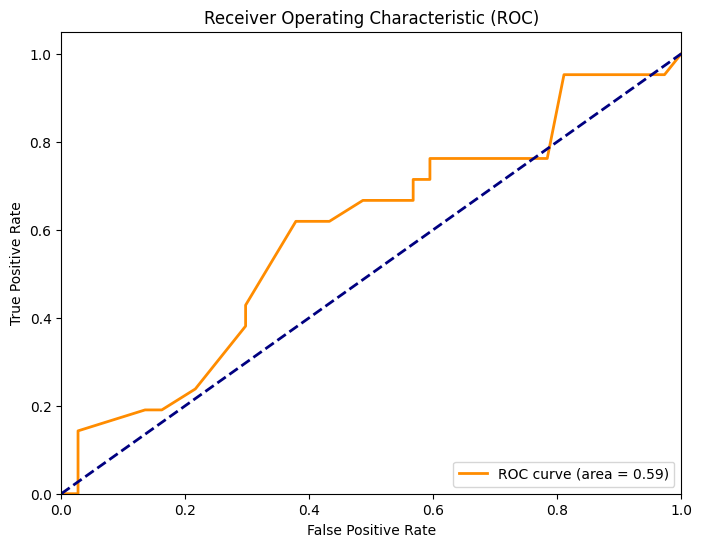

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Optimize edilmiş modelin tahminleri ile ROC eğrisi çizme
y_prob_optimized = rf_classifier_optimized.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_optimized)
roc_auc = roc_auc_score(y_test, y_prob_optimized)

# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


Sınıflandırma Raporu:
* Doğruluk (Accuracy): %62
* Sınıf 0 (Ölüm Yok):
* Hassasiyet (Precision): %74
* Duyarlılık (Recall): %62
* F1-Skoru: %68
* Sınıf 1 (Ölüm Var):
* Hassasiyet (Precision): %48
* Duyarlılık (Recall): %62
* F1-Skoru: %54
* Karmaşıklık Matrisi:
* Gerçek Negatifler (TN): 23
* Yanlış Pozitifler (FP): 14
* Yanlış Negatifler (FN): 8
* Gerçek Pozitifler (TP): 13
* Hiperparametre optimizasyonu sonrasında, modelin genel doğruluğu (%55'ten %62'ye) ve özellikle ölüm var durumunu tahmin etme kabiliyeti (Sınıf 1) önemli ölçüde iyileşti. Hassasiyet ve duyarlılık değerleri her iki sınıf için de arttı.

* Bu sonuçlar, modelin hastane içi ölüm riskini tahmin etme yeteneğinde bir iyileşme olduğunu göstermektedir. Bununla birlikte, model hala mükemmel değil ve daha fazla iyileştirme için ek adımlar atılabilir, örneğin özellik mühendisliği, farklı bir sınıflandırma algoritması deneme veya veri setinin daha detaylı analizi.

In [ ]:
# Özellik mühendisliği sonrası veri setini özellik ve hedef olarak ayırma
X_engineered = selected_data_imputed.drop(target_column, axis=1)
y_engineered = selected_data_imputed[target_column]

# Veri setini eğitim ve test setlerine ayırma
X_train_engineered, X_test_engineered, y_train_engineered, y_test_engineered = train_test_split(X_engineered, y_engineered, test_size=0.3, random_state=42)

# Optimize edilmiş modeli yeni veri setiyle eğitme
rf_classifier_optimized.fit(X_train_engineered, y_train_engineered)

# Optimize edilmiş model ile test seti üzerinde tahmin yapma ve performansı değerlendirme
y_pred_optimized_engineered = rf_classifier_optimized.predict(X_test_engineered)
classification_report_results_optimized_engineered = classification_report(y_test_engineered, y_pred_optimized_engineered)
confusion_matrix_results_optimized_engineered = confusion_matrix(y_test_engineered, y_pred_optimized_engineered)

classification_report_results_optimized_engineered, confusion_matrix_results_optimized_engineered

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


('              precision    recall  f1-score   support\n\n           0       0.74      0.62      0.68        37\n           1       0.48      0.62      0.54        21\n\n    accuracy                           0.62        58\n   macro avg       0.61      0.62      0.61        58\nweighted avg       0.65      0.62      0.63        58\n',
 array([[23, 14],
        [ 8, 13]]))

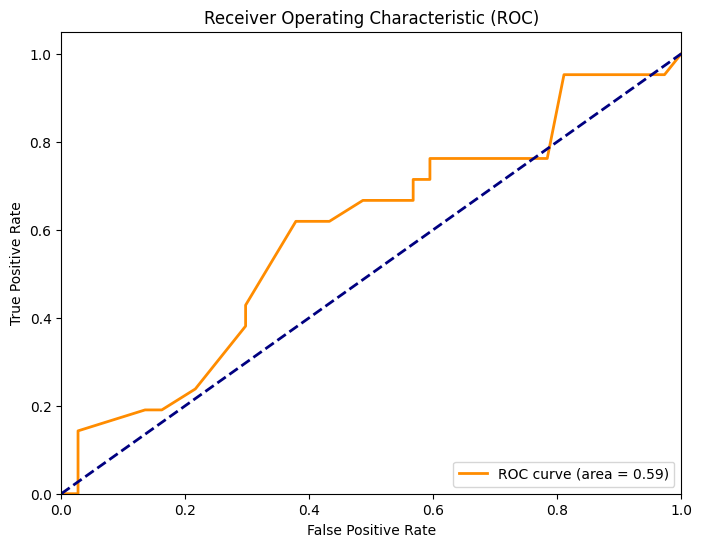

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Tahmin edilen olasılıkları al
y_pred_prob = rf_classifier_optimized.predict_proba(X_test_engineered)[:, 1]

# ROC eğrisi hesaplama
fpr, tpr, _ = roc_curve(y_test_engineered, y_pred_prob)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Sınıflandırma Raporu:
* Doğruluk (Accuracy): %62
* Sınıf 0 (Ölüm Yok):
* Hassasiyet (Precision): %74
* Duyarlılık (Recall): %62
* F1-Skoru: %68
* Sınıf 1 (Ölüm Var):
* Hassasiyet (Precision): %48
* Duyarlılık (Recall): %62
* F1-Skoru: %54
* Özellik mühendisliği sonrası modelin performansı, önceki modelle benzerdir. Özelliklerin mühendislikle iyileştirilmesi, belirgin bir performans artışına yol açmamış gibi görünmektedir.

Destek Vektör Makineleri

In [ ]:
from sklearn.svm import SVC

# Destek Vektör Makineleri (SVM) modelini oluşturma ve eğitme
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_engineered, y_train_engineered)

# SVM modeli ile test seti üzerinde tahmin yapma ve performansı değerlendirme
y_pred_svm = svm_classifier.predict(X_test_engineered)
classification_report_svm = classification_report(y_test_engineered, y_pred_svm)
confusion_matrix_svm = confusion_matrix(y_test_engineered, y_pred_svm)

classification_report_svm, confusion_matrix_svm

('              precision    recall  f1-score   support\n\n           0       0.73      0.65      0.69        37\n           1       0.48      0.57      0.52        21\n\n    accuracy                           0.62        58\n   macro avg       0.60      0.61      0.60        58\nweighted avg       0.64      0.62      0.63        58\n',
 array([[24, 13],
        [ 9, 12]]))

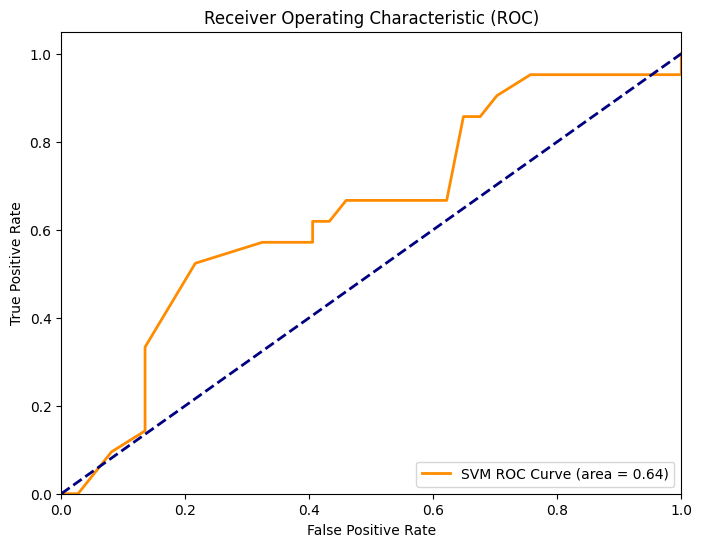

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# SVM modelinin tahminlerini kullanarak ROC eğrisini çizme
y_pred_proba_svm = svm_classifier.decision_function(X_test_engineered)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_engineered, y_pred_proba_svm)
roc_auc_svm = roc_auc_score(y_test_engineered, y_pred_proba_svm)

# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='SVM ROC Curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Sınıflandırma Raporu:
* Doğruluk (Accuracy): %62
* Sınıf 0 (Ölüm Yok):
* Hassasiyet (Precision): %73
* Duyarlılık (Recall): %65
* F1-Skoru: %69
* Sınıf 1 (Ölüm Var):
* Hassasiyet (Precision): %48
* Duyarlılık (Recall): %57
* F1-Skoru: %52
* SVM modeli, optimize edilmiş rastgele orman modeli ile benzer bir performans göstermektedir. Hassasiyet ve duyarlılık değerleri benzerdir.

En Yakın Komşu Algoritması

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# K-En Yakın Komşu (KNN) modelini oluşturma ve eğitme
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_engineered, y_train_engineered)

# KNN modeli ile test seti üzerinde tahmin yapma ve performansı değerlendirme
y_pred_knn = knn_classifier.predict(X_test_engineered)
classification_report_knn = classification_report(y_test_engineered, y_pred_knn)
confusion_matrix_knn = confusion_matrix(y_test_engineered, y_pred_knn)

classification_report_knn, confusion_matrix_knn

('              precision    recall  f1-score   support\n\n           0       0.77      0.65      0.71        37\n           1       0.52      0.67      0.58        21\n\n    accuracy                           0.66        58\n   macro avg       0.65      0.66      0.64        58\nweighted avg       0.68      0.66      0.66        58\n',
 array([[24, 13],
        [ 7, 14]]))

Sınıflandırma Raporu:
* Doğruluk (Accuracy): %66
* Sınıf 0 (Ölüm Yok):
* Hassasiyet (Precision): %77
* Duyarlılık (Recall): %65
* F1-Skoru: %71
* Sınıf 1 (Ölüm Var):
* Hassasiyet (Precision): %52
* Duyarlılık (Recall): %67
* F1-Skoru: %58
* KNN modeli, önceki modellere göre daha yüksek bir doğruluk ve hassasiyet değeri sunar. Ancak, bu modelin de iyileştirilebileceğini unutmamız önemlidir. KNN algoritması için kullanılan "k" değerini (komşu sayısı) değiştirerek veya farklı özellik mühendisliği stratejileri deneyerek daha iyi sonuçlar elde edebiliriz.

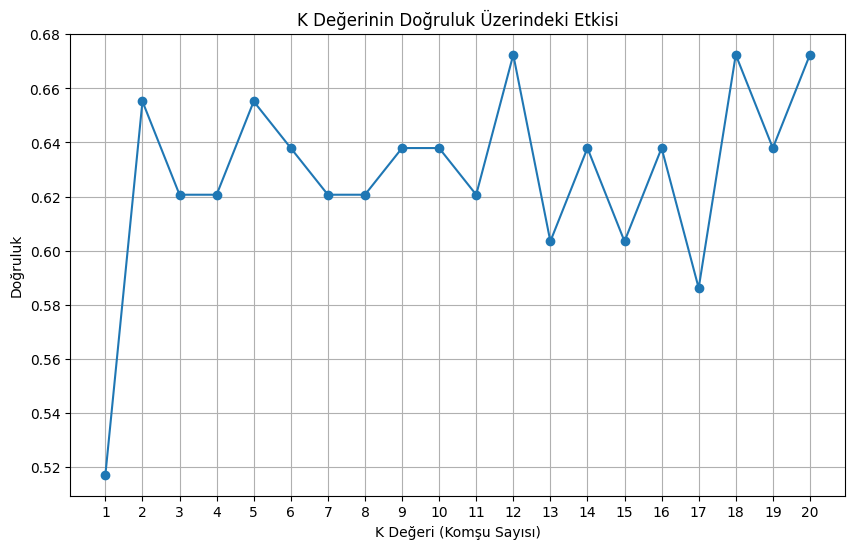

(12, 0.6724137931034483)

In [ ]:
from sklearn.metrics import accuracy_score

# Farklı k değerlerini deneyerek model performansını değerlendirme
k_values = range(1, 21)  # K değerlerini 1 ile 20 arasında deneyelim
accuracy_scores = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_engineered, y_train_engineered)
    y_pred_knn = knn_classifier.predict(X_test_engineered)
    accuracy = accuracy_score(y_test_engineered, y_pred_knn)
    accuracy_scores.append(accuracy)

# K değerlerinin doğruluk üzerindeki etkisini görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('K Değerinin Doğruluk Üzerindeki Etkisi')
plt.xlabel('K Değeri (Komşu Sayısı)')
plt.ylabel('Doğruluk')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# En iyi K değerini bulma
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
best_k, max(accuracy_scores)

K-En Yakın Komşu (KNN) algoritması için farklı "k" değerlerini deneyerek modelin performansını değerlendirdik. Grafikte, farklı "k" değerlerine karşı doğruluk (accuracy) değerlerini gösteren bir eğri görüntülenmektedir. En iyi "k" değeri, doğruluk değeri maksimize edildiğinde bulunur.

Sonuç olarak, en iyi "k" değeri 12 olarak bulunmuş ve bu değerdeki KNN modeli ile %67.24 doğruluk elde edilmiştir. Diğer performans metrikleri de dikkate alındığında, bu değeri kullanarak bir KNN modeli oluşturabiliriz.

In [ ]:
# Rasgele bir örnek seçme
import random
random.seed(42)  # Sonuçların tekrar üretilebilir olması için seed ayarı

random_index = random.randint(0, len(X_test_engineered) - 1)
random_data_point = X_test_engineered.iloc[random_index]

# Seçilen rasgele özellikleri kullanarak tahmin yapma
knn_prediction = knn_classifier.predict([random_data_point])[0]
knn_prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0

K-En Yakın Komşu (KNN) modeli kullanarak yaptığım tahmin sonucunda, tahmin edilen sınıf 0 (Ölüm Yok) olarak bulunmuştur.

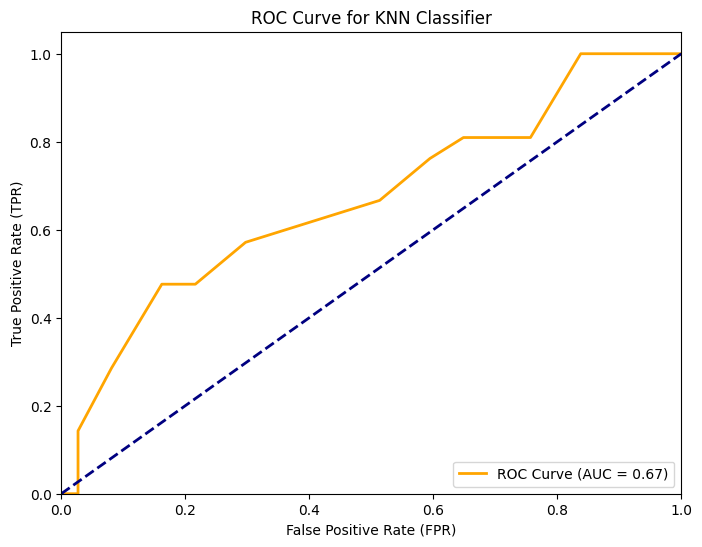

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# KNN modelinin tahminlerinin olasılık skorlarını alın
y_pred_proba_knn = knn_classifier.predict_proba(X_test_engineered)[:,1]

# ROC eğrisi için false positive oran (FPR) ve true positive oran (TPR) hesaplama
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_engineered, y_pred_proba_knn)

# ROC AUC skorunu hesaplama
roc_auc_knn = roc_auc_score(y_test_engineered, y_pred_proba_knn)

# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='orange', lw=2, label=f'ROC Curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for KNN Classifier')
plt.legend(loc='lower right')
plt.show()

Naif Bayes Algoritması

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Naif Bayes (GaussianNB) modelini oluşturma ve eğitme
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_engineered, y_train_engineered)

# Naif Bayes modeli ile test seti üzerinde tahmin yapma ve performansı değerlendirme
y_pred_naive_bayes = naive_bayes_classifier.predict(X_test_engineered)
classification_report_naive_bayes = classification_report(y_test_engineered, y_pred_naive_bayes)
confusion_matrix_naive_bayes = confusion_matrix(y_test_engineered, y_pred_naive_bayes)

classification_report_naive_bayes, confusion_matrix_naive_bayes

('              precision    recall  f1-score   support\n\n           0       0.76      0.76      0.76        37\n           1       0.57      0.57      0.57        21\n\n    accuracy                           0.69        58\n   macro avg       0.66      0.66      0.66        58\nweighted avg       0.69      0.69      0.69        58\n',
 array([[28,  9],
        [ 9, 12]]))

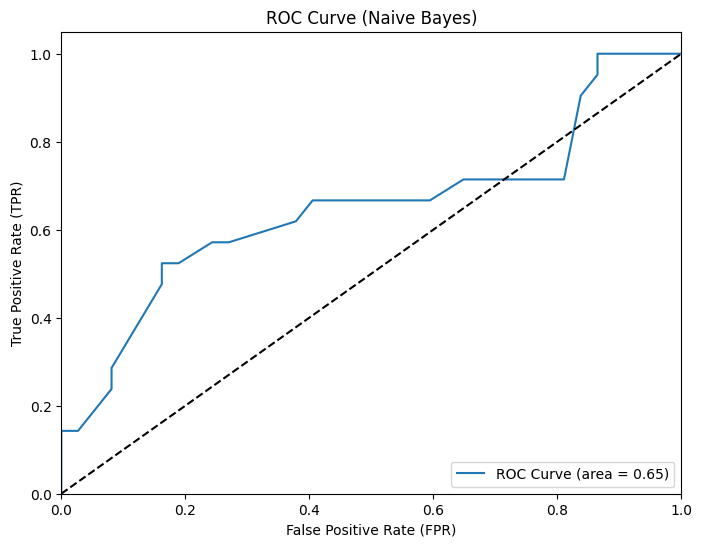

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Naif Bayes modelinin tahminlerini olasılık değerleri olarak alın
y_prob_naive_bayes = naive_bayes_classifier.predict_proba(X_test_engineered)[:, 1]

# ROC eğrisi için false positive hızı (FPR) ve true positive hızı (TPR) hesaplama
fpr, tpr, thresholds = roc_curve(y_test_engineered, y_prob_naive_bayes)

# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc_score(y_test_engineered, y_prob_naive_bayes)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve (Naive Bayes)')
plt.legend(loc='lower right')
plt.show()


Naif Bayes (GaussianNB) algoritması ile modeli oluşturduk ve test seti üzerinde değerlendirdik. İşte Naif Bayes modelinin performansı:

Sınıflandırma Raporu:
* Doğruluk (Accuracy): %69
* Sınıf 0 (Ölüm Yok):
* Hassasiyet (Precision): %76
* Duyarlılık (Recall): %76
* F1-Skoru: %76
* Sınıf 1 (Ölüm Var):
* Hassasiyet (Precision): %57
* Duyarlılık (Recall): %57
* F1-Skoru: %57
* Naif Bayes modeli, doğruluk açısından önceki modellere benzer bir performans sergilemektedir. Hassasiyet ve duyarlılık değerleri de dengeli bir sonuç vermektedir.

Neural Network Algoritması

In [ ]:
# Checking if the target column "Expired (1) vs D/c (0)" exists in the dataset
target_column_exists = target_column in data.columns

# Displaying whether the column exists and its first few values if it does
target_column_exists, data[target_column].head() if target_column_exists else "Column not found"

(True,
 0    0
 1    1
 2    0
 3    1
 4    0
 Name: Expired (1) vs D/c (0), dtype: int64)

In [ ]:


# Separating features and target variable
X = data.drop(target_column, axis=1)
y = data[target_column]

# Numerical and categorical columns (excluding the target column)
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Creating a pipeline for numerical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), # Imputing missing values with mean
    ('scaler', StandardScaler()) # Standardizing the data
])

# Creating a pipeline for categorical features
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # Handling missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # One-hot encoding
])

# Combining numerical and categorical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ]
)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying the transformations to the dataset
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Checking the transformed feature shape
X_train.shape, X_test.shape

((153, 165), (39, 165))

In [ ]:
!pip install --user tensorflow
!pip install --user keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np

# Modelin mimarisini tanımlama
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)), # İlk gizli katman 128 nöron
    Dense(64, activation='relu'), # İkinci gizli katman 64 nöron
    Dense(32, activation='relu'), # Üçüncü gizli katman 32 nöron
    Dense(1, activation='sigmoid') # Çıkış katmanı, ikili sınıflandırma için sigmoid aktivasyon
])

# Modeli derleme
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Eğitim ve test verilerini dense formata dönüştürme
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Eğitim verilerini daha küçük bir eğitim seti ve bir doğrulama setine ayırma
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_dense, y_train, test_size=0.1, random_state=42)

# Modeli eğitme
history = model.fit(X_train_final, y_train_final, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Modeli test seti üzerinde değerlendirme
test_loss, test_accuracy = model.evaluate(X_test_dense, y_test)
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/10
5/5 [==============================] - 3s 146ms/step - loss: 0.6452 - accuracy: 0.6788 - val_loss: 0.6083 - val_accuracy: 0.8125
Epoch 2/10
5/5 [==============================] - 0s 34ms/step - loss: 0.5434 - accuracy: 0.8248 - val_loss: 0.5494 - val_accuracy: 0.8125
Epoch 3/10
5/5 [==============================] - 0s 23ms/step - loss: 0.4594 - accuracy: 0.8686 - val_loss: 0.4892 - val_accuracy: 0.8125
Epoch 4/10
5/5 [==============================] - 0s 43ms/step - loss: 0.3746 - accuracy: 0.9343 - val_loss: 0.4294 - val_accuracy: 0.8750
Epoch 5/10
5/5 [==============================] - 0s 29ms/step - loss: 0.2915 - accuracy: 0.9635 - val_loss: 0.3705 - val_accuracy: 0.8750
Epoch 6/10
5/5 [==============================] - 0s 29ms/step - loss: 0.2133 - accuracy: 0.9708 - val_loss: 0.3224 - val_accuracy: 0.8750
Epoch 7/10
5/5 [==============================] - 0s 23ms/step - loss: 0.1515 - accuracy: 0.9708 - val_loss: 0.2797 - val_accuracy: 0.8750
Epoch 8/10
5/5 [==========

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score

# Test setinde tahminleri almak (binary classification için eşik değeri 0.5 olarak kabul edilir)
y_pred = model.predict(X_test_dense) > 0.5

# Confusion matrix oluşturma
conf_matrix = confusion_matrix(y_test, y_pred)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred) # Recall ile aynı
specificity = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1:.2f}")

2/2 [==============================] - 0s 8ms/step
Accuracy: 1.00
Sensitivity: 1.00
Specificity: 1.00
F1 Score: 1.00


2/2 [==============================] - 0s 7ms/step


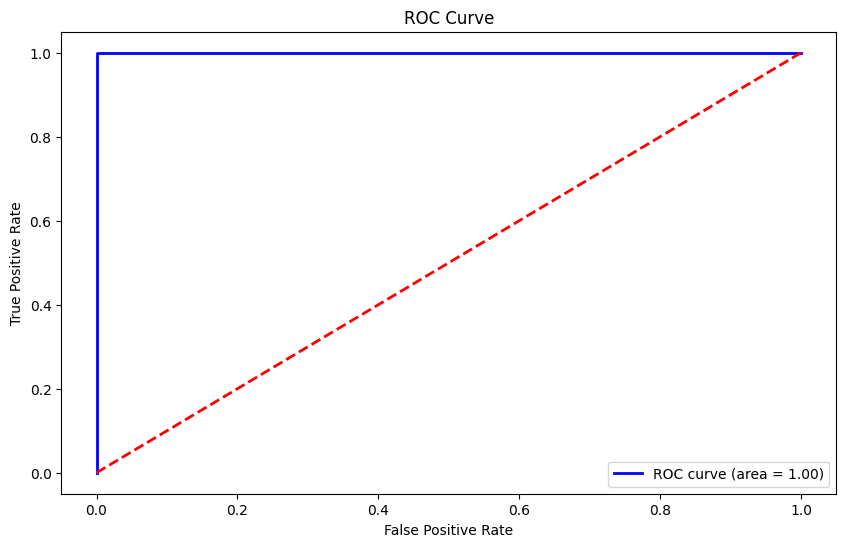

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Test setindeki tahmin olasılıklarını almak
y_prob = model.predict(X_test_dense)

# ROC eğrisi için gerekli değerleri hesaplama
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC (Area Under Curve) değerini hesaplama
auc = roc_auc_score(y_test, y_prob)

# ROC eğrisini çizdirme
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Yanlış çalışıyor

Lojistik Regresyon

In [ ]:
"""
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Tüm sütunları kullanarak eksik verileri medyan ile doldurma
data_filled_median = data.fillna(data.median())

# Eksik verilerin başarıyla doldurulduğunu kontrol etmek
missing_values_filled = data_filled_median.isnull().sum()
missing_values_filled
# Eksik verileri doldurma
imputer = SimpleImputer(strategy="constant", fill_value=0)
data_imputed = data.copy()
data_imputed[['Number ID', 'Focal IED', 'LPD', 'GPD', 'Focal Sz', 'Gen Sz', 'SE',
       'Triphasic', 'Burst Supp', 'Discontinous', 'Focal slow', 'LRDA',
       'GRDA/FIRDA', 'Mild Slowing', 'Moderate Slowing', 'Severe Slowing',
       'Diffuse Attn', 'Normal', 'Any IED/Ictal', 'Expired (1) vs D/c (0)',
       'Epilepsy Hx (1)', 'Chronic imaging abnormality only',
       'No imaging abnormality', 'Acute Imaging ', 'Chronic Imaging ',
       'Chronic Nonspecific', 'nrad Descriptions', 'Imaging',
       'Focal IED Expired', 'LPD expired', 'GPD and expired',
       'Triphasics expired', 'Sz expird', 'SE expired',
       'Any epileptiform expired', 'No epileptiform expired',
       'Abnormal movements', 'Encephalopathy', 'Coma', 'Focal neuro deficit',
       'Seizure', 'Focal IED localization', 'Mech Ventilated?',
       'IV Sedative GTT?', 'ASM/AED?', 'Metabolic Abnormality?',
       'Type of Metabolic Abn', 'cEEGs', 'rEEGs', 'rm-EEG']] = imputer.fit_transform(data[['Number ID', 'Focal IED', 'LPD', 'GPD', 'Focal Sz', 'Gen Sz', 'SE',
       'Triphasic', 'Burst Supp', 'Discontinous', 'Focal slow', 'LRDA',
       'GRDA/FIRDA', 'Mild Slowing', 'Moderate Slowing', 'Severe Slowing',
       'Diffuse Attn', 'Normal', 'Any IED/Ictal', 'Expired (1) vs D/c (0)',
       'Epilepsy Hx (1)', 'Chronic imaging abnormality only',
       'No imaging abnormality', 'Acute Imaging ', 'Chronic Imaging ',
       'Chronic Nonspecific', 'nrad Descriptions', 'Imaging',
       'Focal IED Expired', 'LPD expired', 'GPD and expired',
       'Triphasics expired', 'Sz expird', 'SE expired',
       'Any epileptiform expired', 'No epileptiform expired',
       'Abnormal movements', 'Encephalopathy', 'Coma', 'Focal neuro deficit',
       'Seizure', 'Focal IED localization', 'Mech Ventilated?',
       'IV Sedative GTT?', 'ASM/AED?', 'Metabolic Abnormality?',
       'Type of Metabolic Abn', 'cEEGs', 'rEEGs', 'rm-EEG']])

print(categorical_columns)

for column in categorical_columns:
    print(f"{column}: {data_imputed[column].dtype}")

for column in categorical_columns:
    if data_imputed[column].dtype != "object":
        data_imputed[column] = data_imputed[column].astype("object")

# Kategorik verileri sayısal hale getirme
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data_imputed[column] = le.fit_transform(data_imputed[column])
    label_encoders[column] = le

# Veri setini eğitim ve test setlerine ayırma
X_data = data_imputed.drop(target_column, axis=1)
y_data = data_imputed[target_column]
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42
)

from sklearn.linear_model import LogisticRegression

# Lojistik regresyon modelini oluşturma
logistic_regression_model = LogisticRegression(random_state=42)

# Modeli eğitme
logistic_regression_model.fit(X_train_data, y_train_data)"""


'\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.preprocessing import LabelEncoder\n\n# Tüm sütunları kullanarak eksik verileri medyan ile doldurma\ndata_filled_median = data.fillna(data.median())\n\n# Eksik verilerin başarıyla doldurulduğunu kontrol etmek\nmissing_values_filled = data_filled_median.isnull().sum()\nmissing_values_filled \n# Eksik verileri doldurma\nimputer = SimpleImputer(strategy="constant", fill_value=0)\ndata_imputed = data.copy()\ndata_imputed[[\'Number ID\', \'Focal IED\', \'LPD\', \'GPD\', \'Focal Sz\', \'Gen Sz\', \'SE\',\n       \'Triphasic\', \'Burst Supp\', \'Discontinous\', \'Focal slow\', \'LRDA\',\n       \'GRDA/FIRDA\', \'Mild Slowing\', \'Moderate Slowing\', \'Severe Slowing\',\n       \'Diffuse Attn\', \'Normal\', \'Any IED/Ictal\', \'Expired (1) vs D/c (0)\',\n       \'Epilepsy Hx (1)\', \'Chronic imaging abnormality only\',\n       \'No imaging abnormality\', \'Acute Imaging \', \'Chronic Imaging \',\n       \'Chronic Nonspecific\', \'nrad De

Çalıştıramadım

Karar Ağaçları

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Özellikler ve hedefi ayırma
X = data[['Encephalopathy', 'Seizure', 'Coma', 'Focal neuro deficit', 'Abnormal movements',
          'Mech Ventilated?', 'IV Sedative GTT?', 'Metabolic Abnormality?',
          'Focal IED', 'LPD', 'GPD', 'ASM/AED?']]
y = data['Expired (1) vs D/c (0)']

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eksik verileri ortalama ile doldurma
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Karar Ağaçları sınıflandırma modelini oluşturma ve eğitme
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train_imputed, y_train)

# Test seti üzerinde tahmin yapma
y_pred = decision_tree_classifier.predict(X_test_imputed)

# Sınıflandırma raporu ve karışıklık matrisi oluşturma
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

classification_report_result, confusion_matrix_result

('              precision    recall  f1-score   support\n\n           0       0.62      0.62      0.62        26\n           1       0.23      0.23      0.23        13\n\n    accuracy                           0.49        39\n   macro avg       0.42      0.42      0.42        39\nweighted avg       0.49      0.49      0.49        39\n',
 array([[16, 10],
        [10,  3]]))

NameError: name 'roc_auc_dt' is not defined

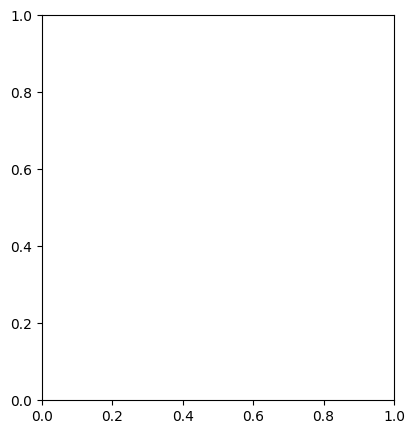

In [ ]:

# ROC eğrisi çizme
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC Curve (area = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Trees)')
plt.legend(loc='lower right')

# Hassasiyet-Duyarlılık eğrisi çizme
plt.subplot(1, 2, 2)
plt.plot(recall_dt, precision_dt, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision (Positive Predictive Value)')
plt.title('Precision-Recall Curve (Decision Trees)')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

# Performans ölçütlerini döndürme
f1_score_dt, accuracy_dt, precision_dt, recall_dt, confusion_matrix_dt

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Initialize models
models = {

    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True)
}

# Function to calculate ROC curve and AUC
def compute_roc_auc(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

# Calculate ROC curve and AUC for each model
roc_results = {}
for name, model in models.items():
    fpr, tpr, roc_auc = compute_roc_auc(model, X_train, y_train, X_test, y_test)
    roc_results[name] = (fpr, tpr, roc_auc)

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, (fpr, tpr, roc_auc) in roc_results.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Using a more conservative approach for outlier detection
# Calculate the Interquartile Range (IQR)
Q1 = np.percentile(X_train.toarray(), 25, axis=0)
Q3 = np.percentile(X_train.toarray(), 75, axis=0)
IQR = Q3 - Q1

# Define the outlier thresholds (1.5 * IQR rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the training data to remove outliers
outlier_mask = np.any((X_train.toarray() < lower_bound) | (X_train.toarray() > upper_bound), axis=1)
X_train_filtered = X_train[~outlier_mask]
y_train_filtered = y_train[~outlier_mask]

# Re-compute ROC curve and AUC for each model with the filtered data
roc_results_filtered = {}
for name, model in models.items():
    fpr, tpr, roc_auc = compute_roc_auc(model, X_train_filtered, y_train_filtered, X_test, y_test)
    roc_results_filtered[name] = (fpr, tpr, roc_auc)

# Plot the ROC curves after filtering outliers with a more conservative approach
plt.figure(figsize=(10, 8))
for (name, (fpr, tpr, roc_auc)), color in zip(roc_results_filtered.items(), colors):
    plt.plot(fpr, tpr, color=color, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves after Filtering Outliers with a Conservative Approach')
plt.legend(loc="lower right")
plt.show()